In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
def get_metadata():
    with open('arxiv-metadata-oai-snapshot.json', 'r') as f:
        for line in f:
            yield line

In [3]:
arxiv_data = get_metadata()

In [4]:
titles = []
categories = []
ids = []

for paper in arxiv_data:
    paper_dict = json.loads(paper)
    try:
        categories.append(paper_dict.get('categories'))
        titles.append(paper_dict.get('title'))
        ids.append(paper_dict.get('id'))
    except:
        pass 

In [5]:
df = pd.DataFrame({
    'id': ids,
    'title': titles,
    'categories': [i.split(' ') for i in categories]
})

In [6]:
df = df[:100000]

In [7]:
df['categories'] = df['categories'].apply(lambda x: x[0].split('.'))

In [8]:
df.head()

,id,title,categories
0,0704.0001,Calculation of prompt diphoton production cros...,[hep-ph]
1,0704.0002,Sparsity-certifying Graph Decompositions,"[math, CO]"
2,0704.0003,The evolution of the Earth-Moon system based o...,"[physics, gen-ph]"
3,0704.0004,A determinant of Stirling cycle numbers counts...,"[math, CO]"
4,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math, CA]"


Теперь считаем количество всех категорий в датасете и собираем их в список:

In [10]:
all_categories = list()
for article in df.categories:
    for category in article:
        all_categories.append(category)

In [12]:
all_categories = [x.split('.')[0] for x in all_categories]

In [13]:
len(set(all_categories))

127

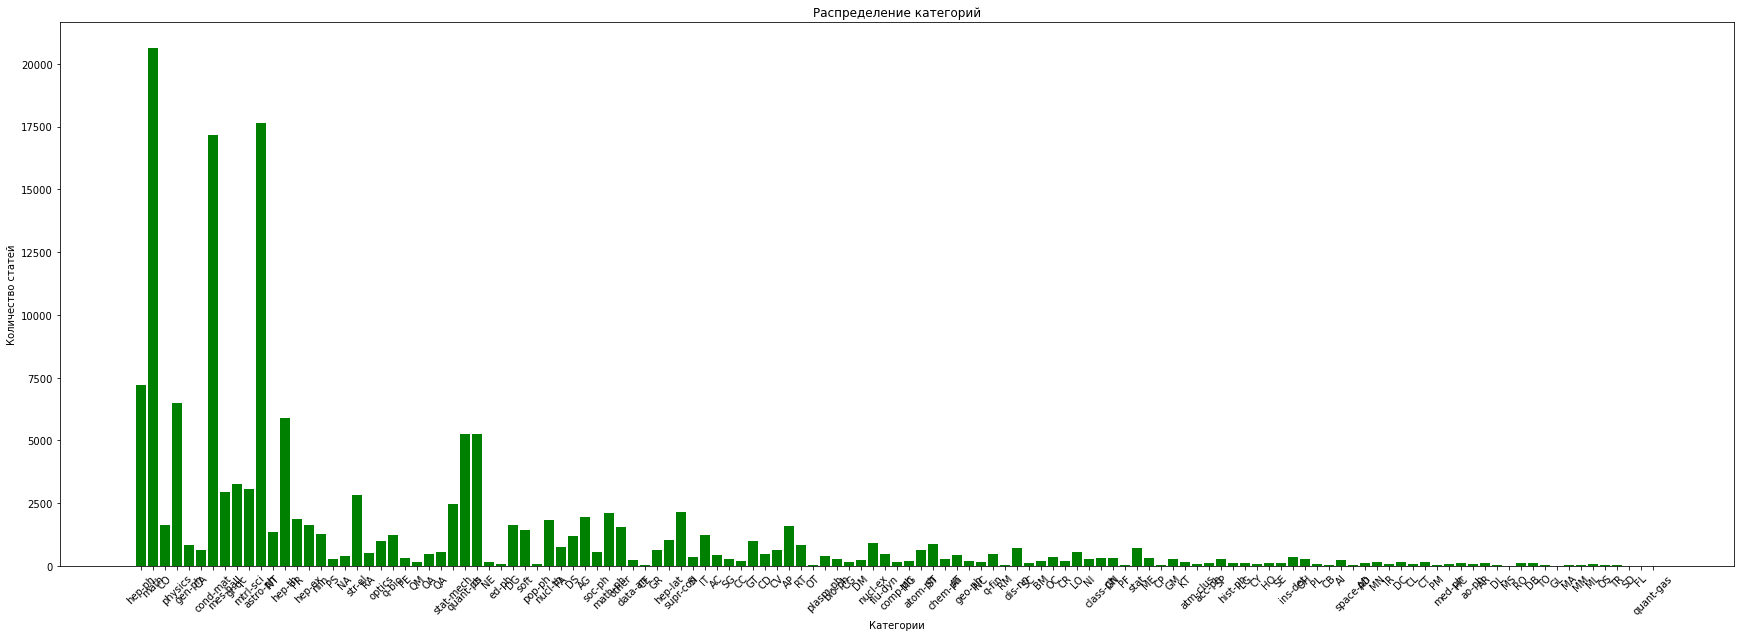

In [20]:
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
c = Counter(all_categories)
plt.xticks(rotation=45)
plt.title('Распределение категорий')
plt.xlabel('Категории')
plt.ylabel('Количество статей')
plt.bar(c.keys(), c.values(), color = "green")
plt.show()

In [21]:
df.to_csv('arxiv.csv', index=False)